# 네이버 영화 정보 수집

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20210127"

header = {
    'usuer-agent' : 'Mozilla/5.0'
}

res = req.get(url, headers = header)

html = bs(res.text, 'html.parser')

In [3]:
def getRequest(url):
    header = {
        'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36'
    }
    return req.get(url, headers=header)

def transform(url):
    return bs(getRequest(url).text, 'html.parser')

def getMoivePoint(url):
    html = transform(url)
    
    # 영화명, 평점 데이터를 가진 요소를 선택
    movieNms = html.select('div.tit5 > a')
    points = html.select('td.point')
    
    movieNmsList = []
    pointsList = []
    
    # 두 개의 빈 리스트에 영화명, 평점 데이터 저장
    for i in range(len(movieNms)):
        movieNmsList.append(movieNms[i].text.strip())
        pointsList.append(points[i].text.strip())
   
    # DataFrame을 생성하기 위해 딕셔너리 형태로 데이터 반환
    return {'영화명' : movieNmsList, '평점' : pointsList}

movie_name_lst = []
movie_names = html.select("div.tit5 > a")
for i in range(len(movie_names)) :
        movie_name_lst.append(movie_names[i].text.strip())

rating_lst = []
ratings = html.select("td.point")
for i in range(len(ratings)) :
        rating_lst.append(ratings[i].text.strip())

In [14]:
import pandas as pd

In [5]:
movie_df = pd.DataFrame(getMoivePoint(url))

In [6]:
movie_df

,영화명,평점
0,극장판 귀멸의 칼날: 무한열차편,9.61
1,극장판 바이올렛 에버가든,9.51
2,언플랜드,9.42
3,소울,9.42
4,부활: 그 증거,9.39
5,동주,9.37
6,늑대와 춤을,9.30
7,인생,9.28
8,페이트 스테이 나이트 헤븐즈필 III.스프링 송,9.27
9,어바웃 타임,9.18


## date_range()함수를 활용하여 날짜 생성

In [7]:
dates = pd.date_range(start='2020-10-15', periods=100)

# 생성된 날짜데이터 --> 문자열로 반환
# dates[0].strftime('%Y%m%d')

dateList = []
for date in dates:
    dateList.append(date.strftime('%Y%m%d'))

# 생성된 날짜 데이터를 활용하여 페이지 주소 생성
- https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=날짜

In [8]:
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date="
url_lst = []
for date in dates:
    print("https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}".format(date.strftime('%Y%m%d')))
    tmp_date = date.strftime('%Y%m%d')
    url_lst.append(url+tmp_date)

https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201015
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201016
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201017
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201018
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201019
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201020
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201021
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201022
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201023
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201024
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201025
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201026
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20201027
https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=2

## 생성된 주소를 활용하여 영화명, 평점 데이터 수집
1. 영화명, 평점 데이터 수집
2. DataFrame 생성(컬럼구성: 영화명, 평점, 날짜)

In [27]:
df2 = pd.DataFrame(columns=['영화명','평점','날짜'])

In [60]:
movieNmsList = []
pointsList = []
datesList = []

for date in dateList:
    url2 = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}".format(date)
    html = transform(url2)
    
    movieNms = html.select('div.tit5 > a')
    points = html.select('td.point')
    
    
                                                                                      
    for i in range(len(movieNms)):
        movieNmsList.append(movieNms[i].text.strip())
        pointsList.append(float(points[i].text.strip()))
        datesList.append(date)                                                                                     

In [61]:
dic2 = {'영화명' : movieNmsList, '평점' : pointsList, '날짜' : datesList}
df2 = pd.DataFrame(dic2)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   영화명     4937 non-null   object 
 1   평점      4937 non-null   float64
 2   날짜      4937 non-null   object 
dtypes: float64(1), object(2)
memory usage: 115.8+ KB


## '피아니스트' 영화의 모든 평점과 날짜 출력
- boolean인덱싱 활용

In [68]:
df2[df2['영화명'] == '담보'].describe()

,평점
count,100.00000
mean,8.89360
std,0.01915
min,8.85000
25%,8.88000
50%,8.90000
75%,8.91000
max,8.92000


In [97]:
df2[df2['영화명'] == '미안해요, 리키'].describe()

,평점
count,36.000000
mean,9.328889
std,0.008204
min,9.320000
25%,9.320000
50%,9.330000
75%,9.340000
max,9.340000


In [102]:
df2['영화명'].unique()

array(['포드 V 페라리', '그대, 고맙소 : 김호중 생애 첫 팬미팅 무비', '소년시절의 너',
       '브레이크 더 사일런스: 더 무비', '피아니스트', '언더독', '스파이더맨: 뉴 유니버스', '톰보이',
       '사랑과 영혼', '제리 맥과이어', '타오르는 여인의 초상', '윤희에게',
       '극장판 짱구는 못말려: 신혼여행 허리케인~ 사라진 아빠!', '아웃포스트', '비투스', '담보', '너의 이름은.',
       '마미', '브리짓 존스의 일기', '찬실이는 복도 많지', '69세', '라라랜드', '기생충', '로렌스 애니웨이',
       '닥터 슬립', '500일의 썸머', '검객', '주디', '리스본행 야간열차', '테넷', '제로 다크 서티',
       '경계선', '프란시스 하', '신문기자', '블레이드 러너 2049', '날씨의 아이', '오! 문희', '라붐',
       '다만 악에서 구하소서', '홀리 모터스', '그린랜드', '소리도 없이', '기기괴괴 성형수', '디바',
       '언힌지드', '죽지않는 인간들의 밤', '강철비2: 정상회담', '국제수사', '뮬란', '우리들', '인생 후르츠',
       '바르다가 사랑한 얼굴들', '벌새', '아무르', '환상의 빛', '한여름의 판타지아', '다시 태어나도 우리',
       '폰조', '페이트 스테이 나이트 헤븐즈필 제2장 로스트 버터플라이',
       '페이트 스테이 나이트 헤븐즈필 제1장 프레시지 플라워', '남매의 여름밤', '위크엔드 인 파리', '울지마 톤즈',
       '파수꾼', '삼진그룹 영어토익반', '공범자들', '박하사탕', '소공녀', '3:10 투 유마',
       '21 브릿지: 테러 셧다운', '스타 이즈 본', '서칭 포 슈가맨', '본 투 비 블루', '미스터트롯: 더 무비',
       '미안해요, 리키', '공동경비구역 JSA', '피아니스트의 전설', '조조 래빗'

## '원더우먼 1984' 영화의 평점 변화도 그리기 
- x축: 날짜
- y축: 평점

In [136]:
# 한글 폰트 설정
from matplotlib import font_manager, rc

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_list

['C:\\Windows\\Fonts\\MyriadPro-Bold.otf',
 'C:\\Windows\\Fonts\\OratorStd.otf',
 'C:\\Windows\\Fonts\\AdobeHebrew-Italic.otf',
 'C:\\Windows\\Fonts\\tahomabd.ttf',
 'C:\\Windows\\Fonts\\HANBatangB.ttf',
 'C:\\Windows\\Fonts\\cambria.ttc',
 'C:\\Windows\\Fonts\\H2HDRM.TTF',
 'C:\\Windows\\Fonts\\KozMinPr6N-Light.otf',
 'C:\\Windows\\Fonts\\HMKMMAG.TTF',
 'C:\\Windows\\Fonts\\BERNHC.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\KBIZ한마음고딕 B.ttf',
 'C:\\Windows\\Fonts\\CharlemagneStd-Bold.otf',
 'C:\\Windows\\Fonts\\MinionPro-Semibold.otf',
 'C:\\Windows\\Fonts\\AGENCYB.TTF',
 'C:\\Windows\\Fonts\\AdobeDevanagari-BoldItalic.otf',
 'C:\\Windows\\Fonts\\AdobeFanHeitiStd-Bold.otf',
 'C:\\Windows\\Fonts\\FRABKIT.TTF',
 'C:\\Windows\\Fonts\\sylfaen.ttf',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\MinionPro-BoldCn.otf',
 'C:\\Windows\\Fonts\\palab.ttf',
 'C:\\Windows\\Fonts\\H2GSRB.TTF',
 'C:\\Windows\\Fonts\\ariblk.ttf',
 'C:\\Windows\\Fonts\\INFROMAN.TTF',
 'C:

In [163]:
font_name = font_manager.FontProperties(fname = 'C:\\Windows\\Fonts\\malgun.ttf').get_name()
font_name

'Malgun Gothic'

In [165]:
rc('font',family=font_name)

In [160]:
x = df2[df2['영화명'] == '원더 우먼 1984']['날짜']
y = df2[df2['영화명'] == '원더 우먼 1984']['평점']

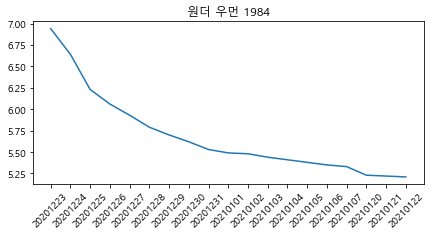

In [166]:
plt.figure(figsize=(7,3))
plt.plot(x, y)
#plt.gca().invert_yaxis()  # y축 데이터를 역방향으로 전환하는 함수
plt.xticks(rotation=45)
plt.title('원더 우먼 1984')

plt.show()

## 모든 영화 평점그래프 그리기

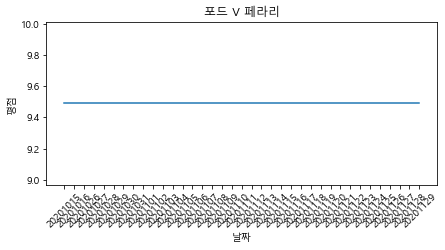

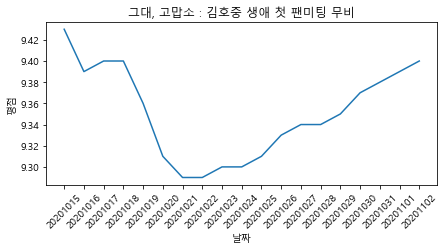

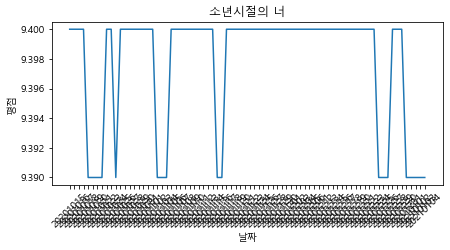

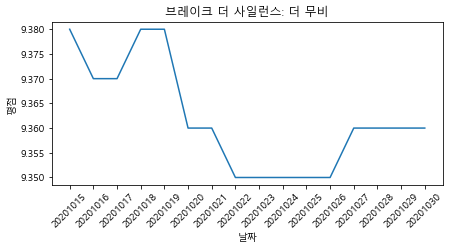

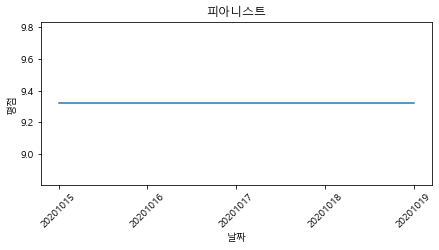

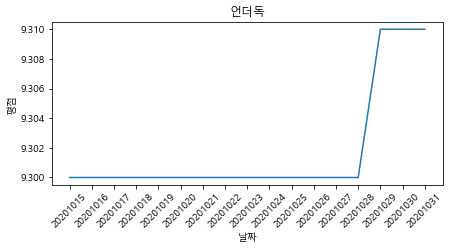

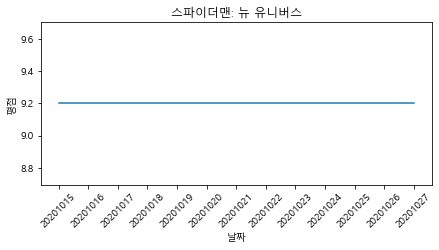

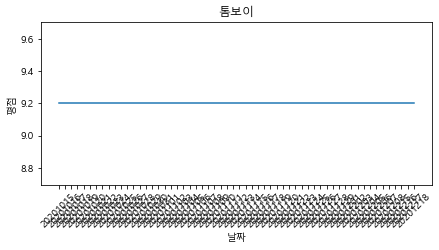

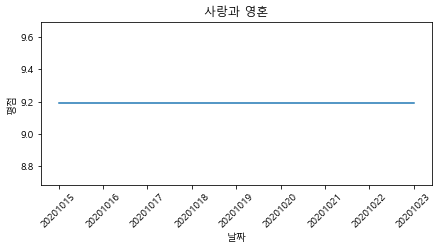

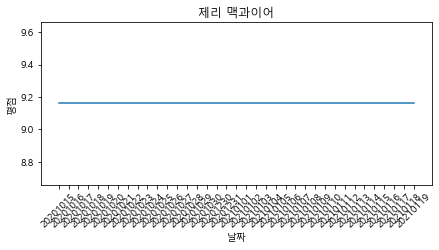

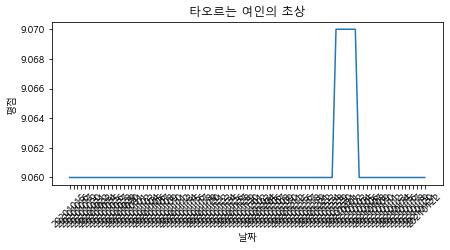

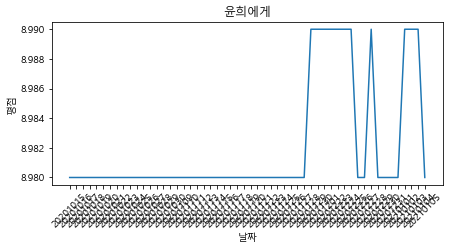

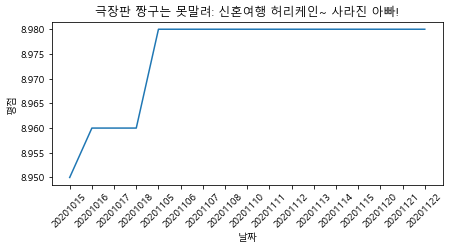

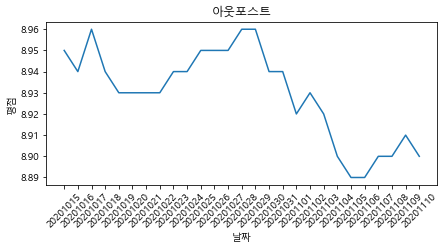

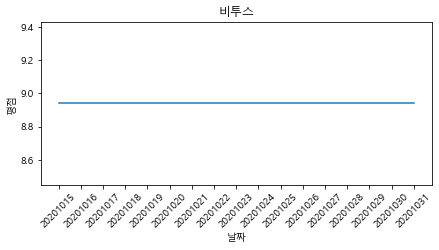

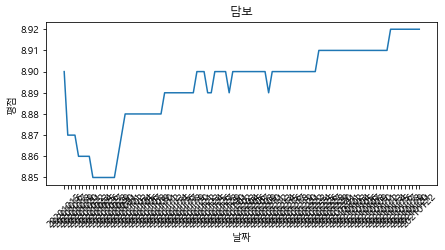

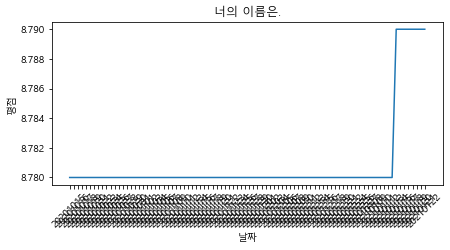

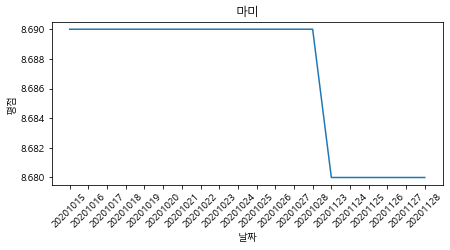

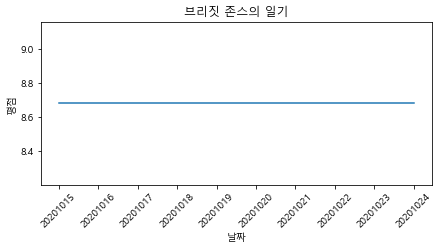

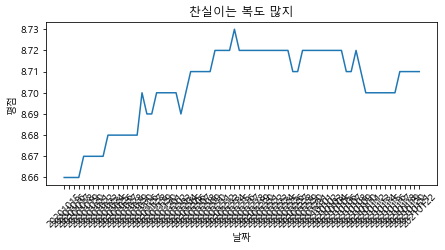

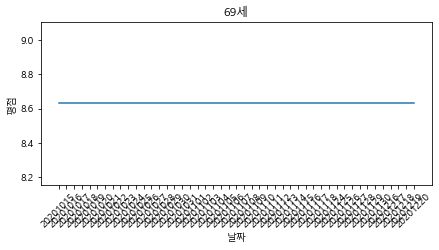

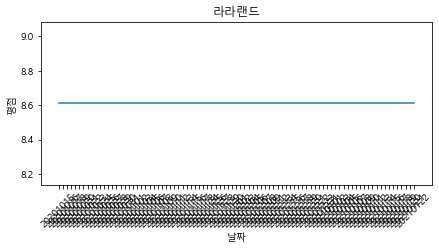

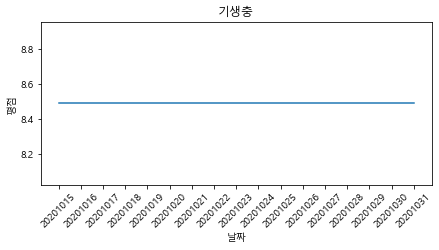

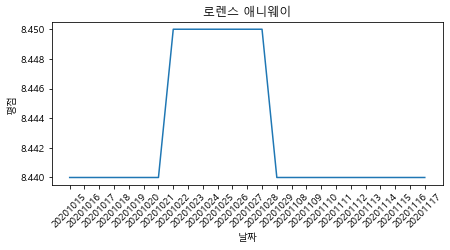

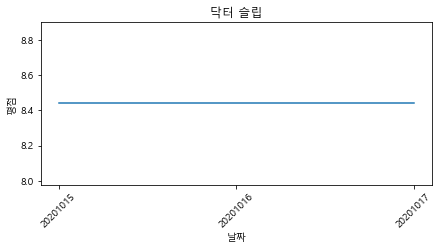

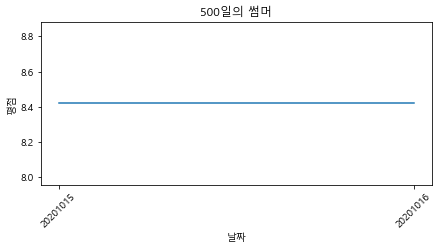

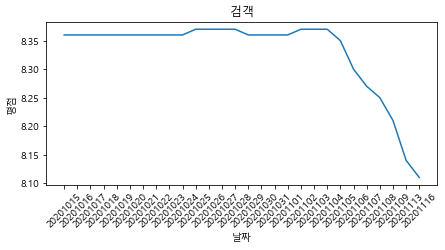

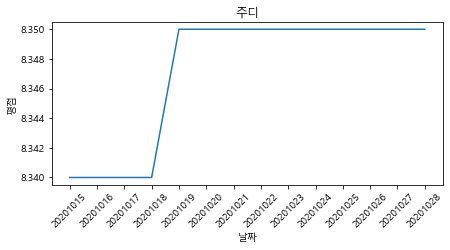

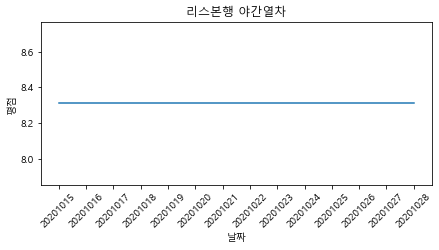

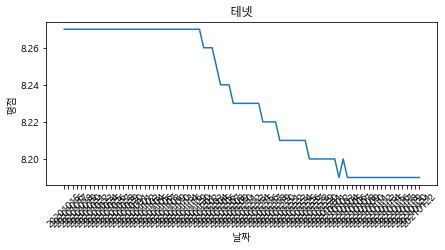

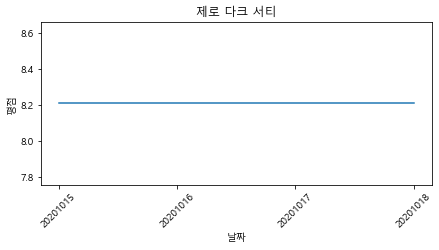

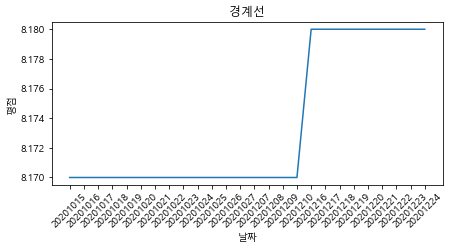

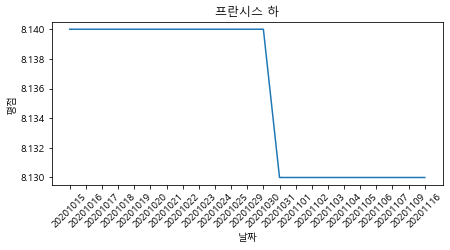

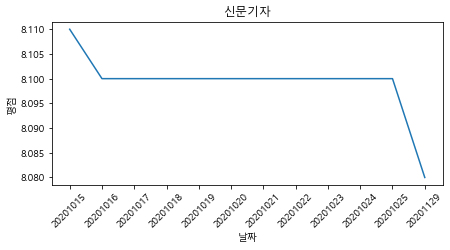

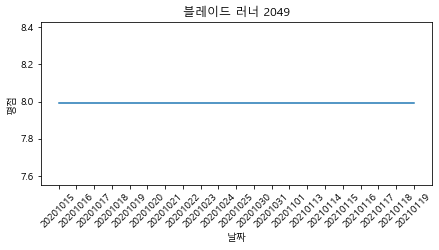

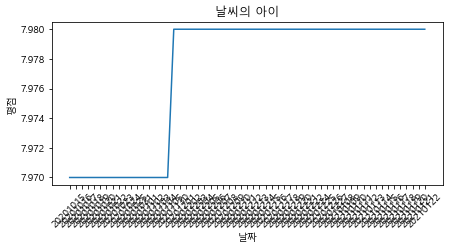

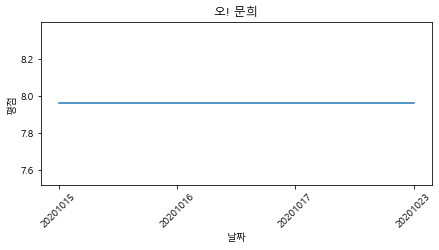

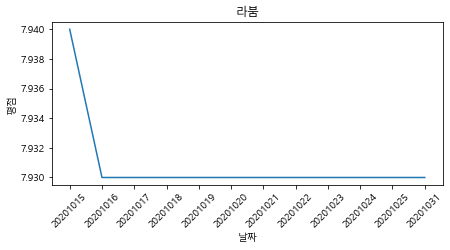

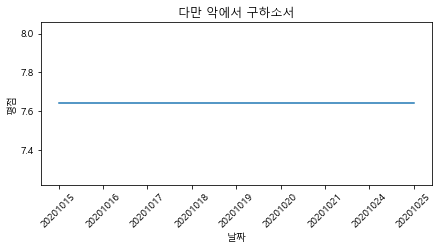

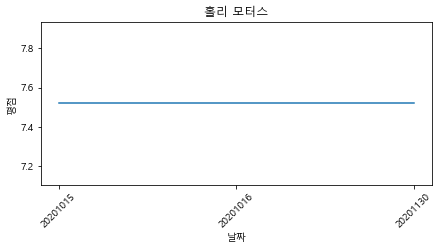

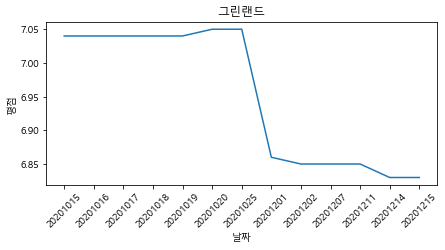

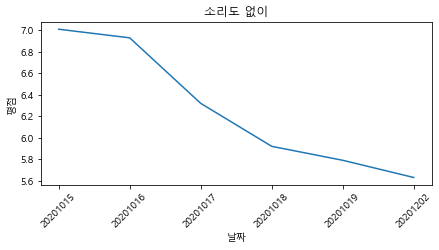

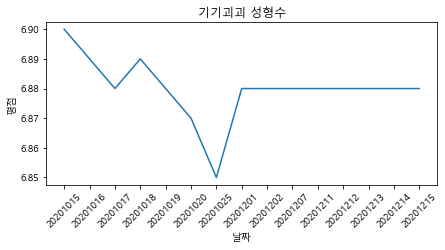

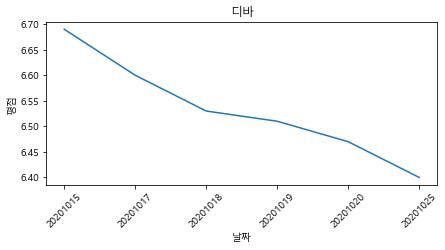

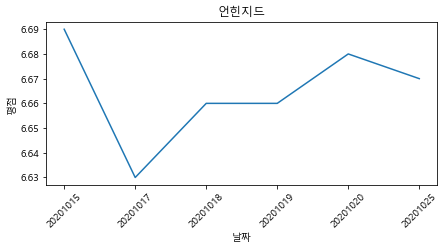

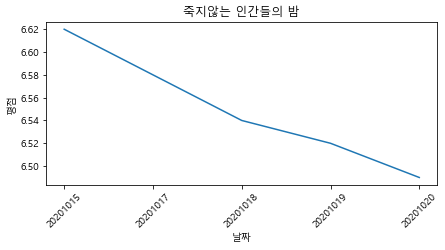

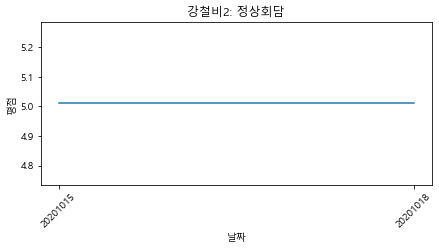

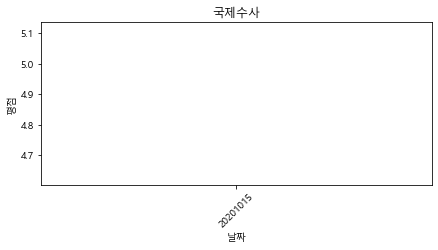

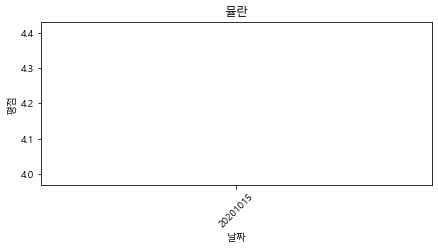

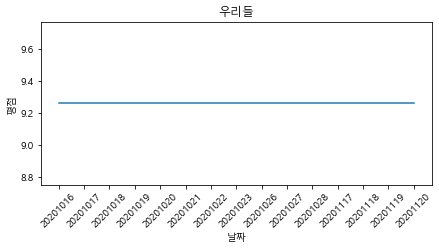

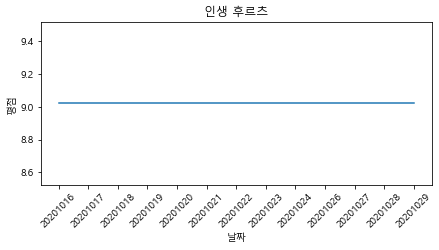

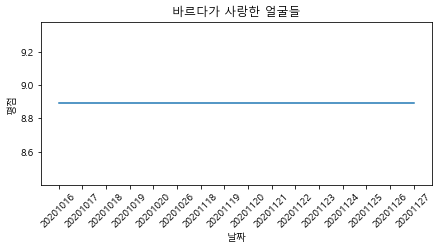

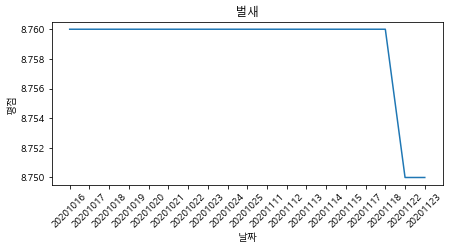

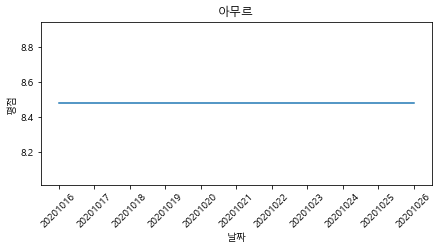

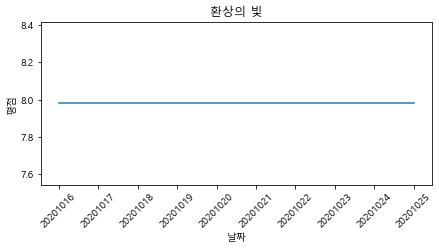

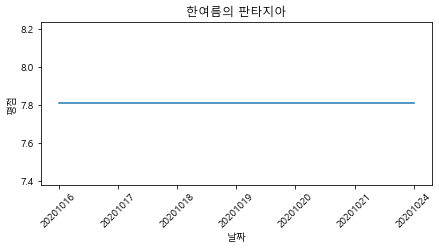

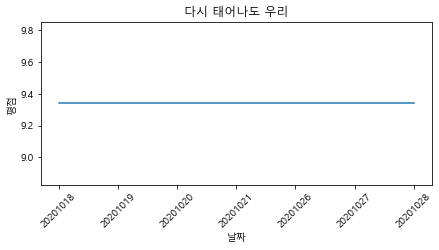

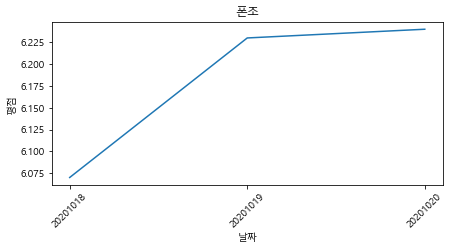

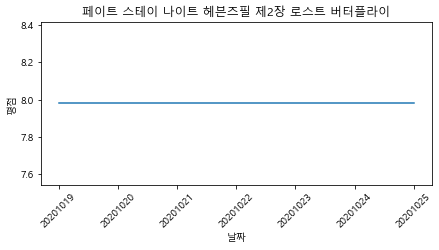

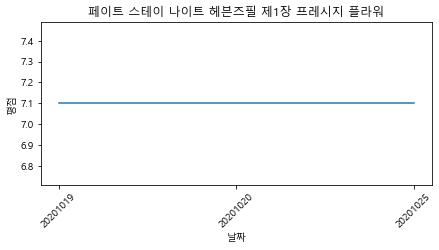

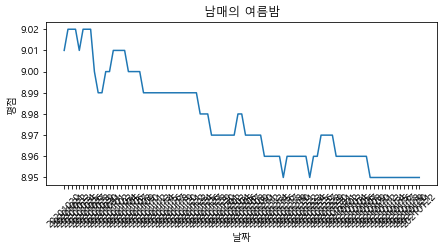

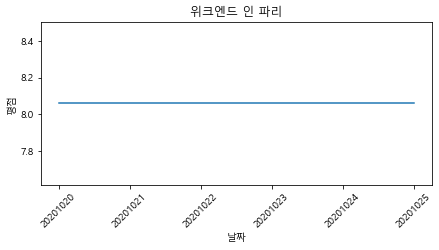

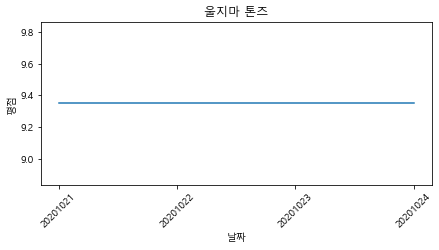

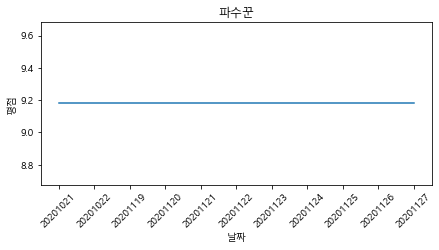

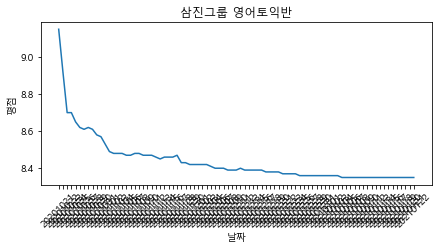

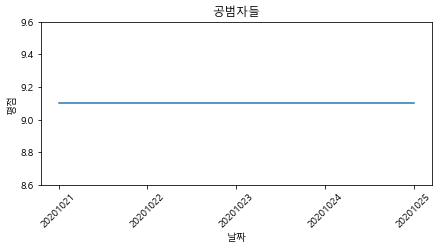

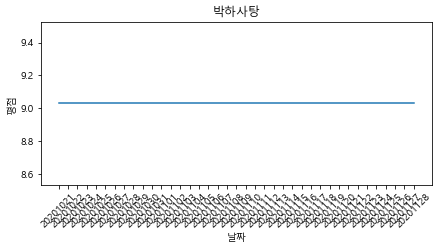

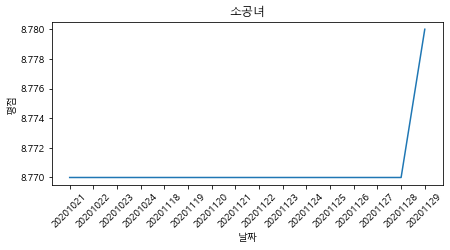

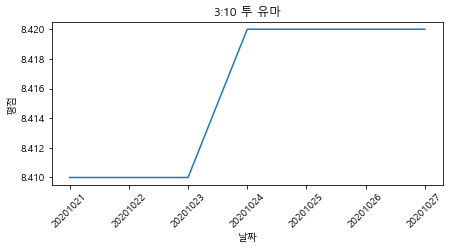

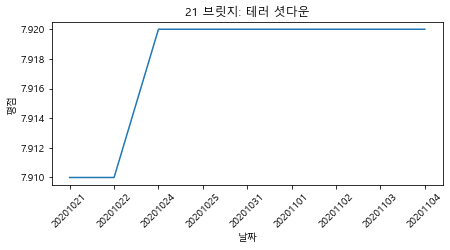

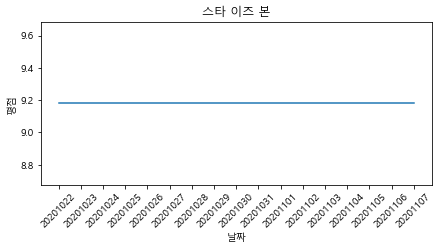

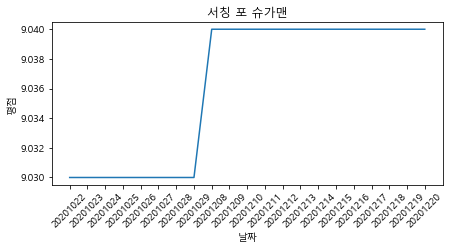

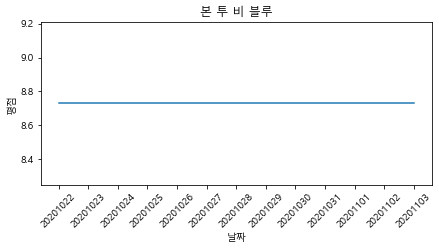

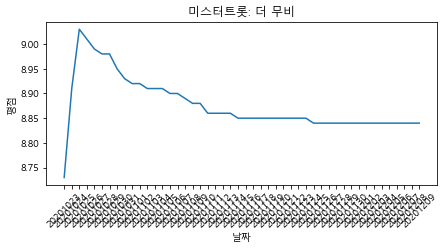

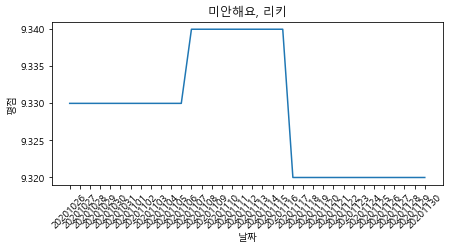

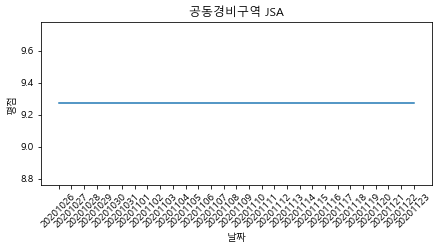

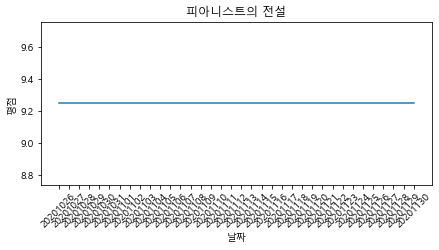

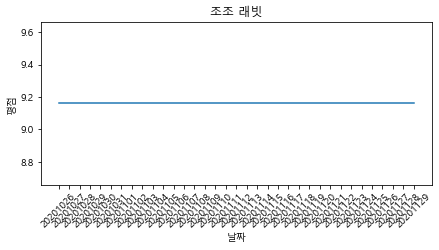

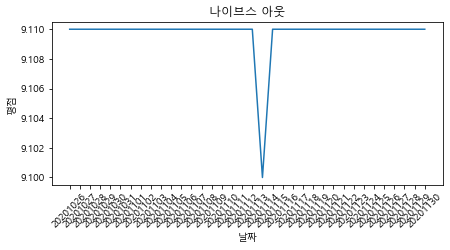

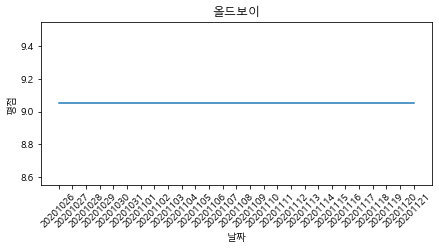

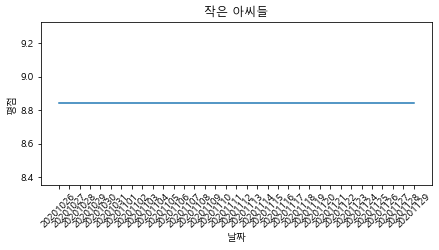

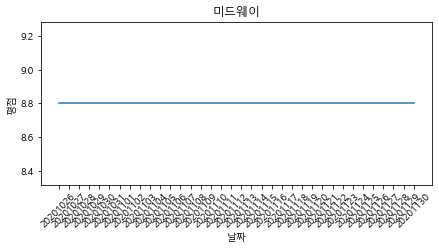

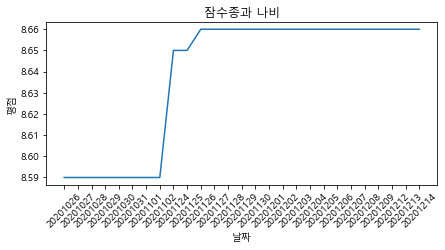

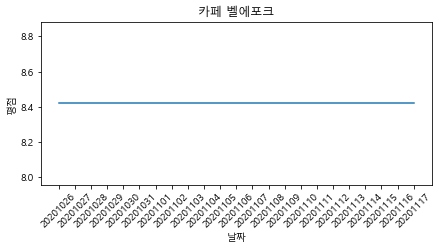

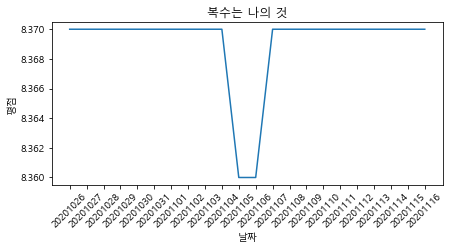

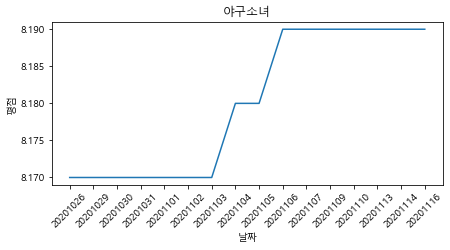

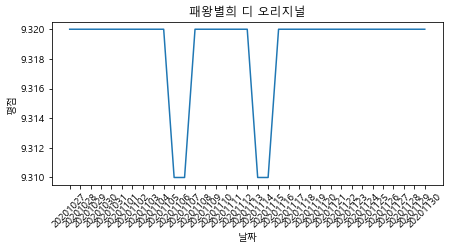

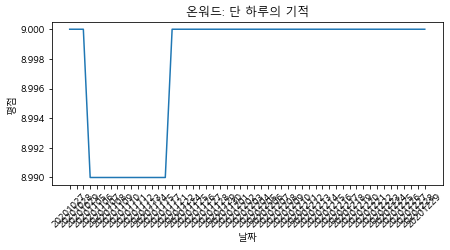

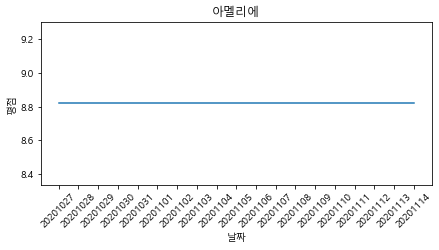

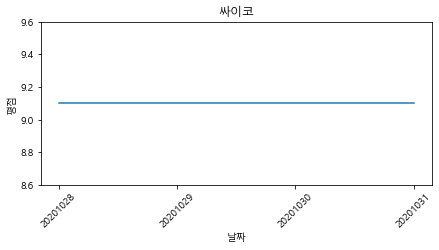

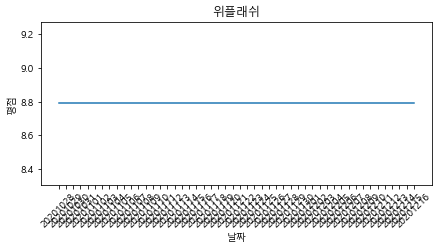

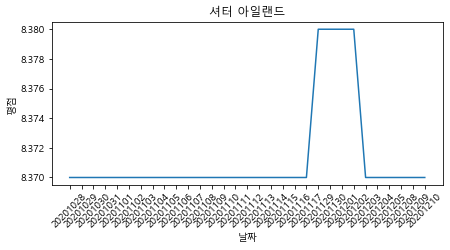

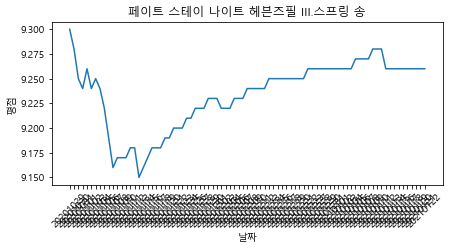

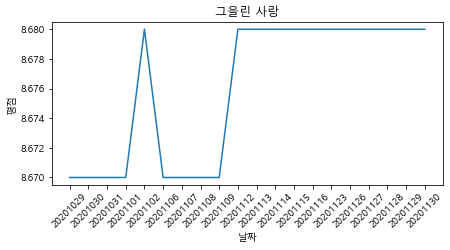

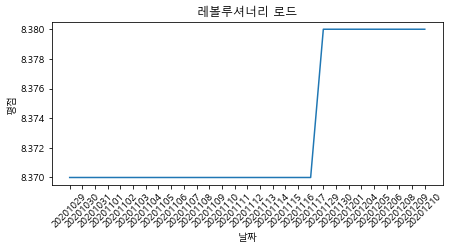

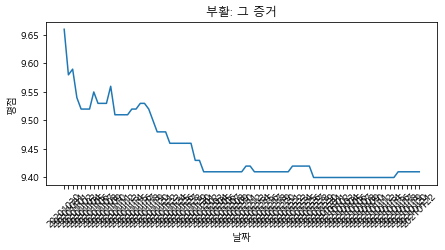

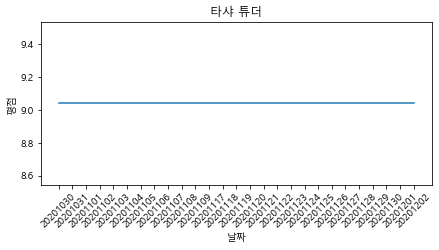

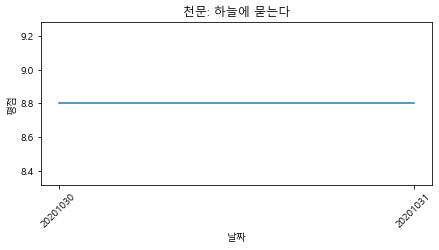

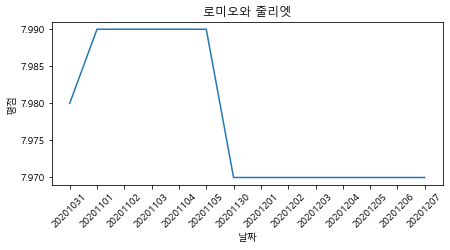

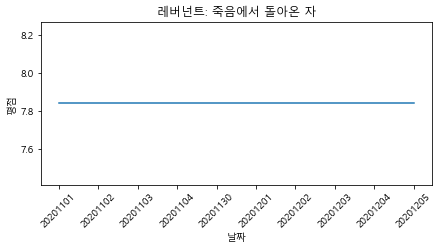

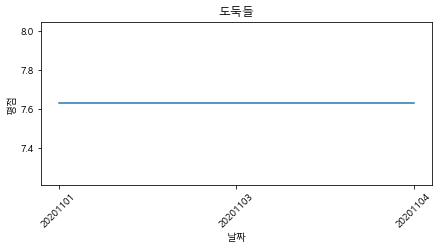

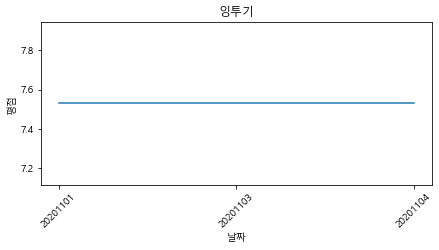

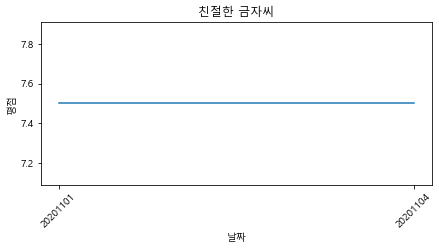

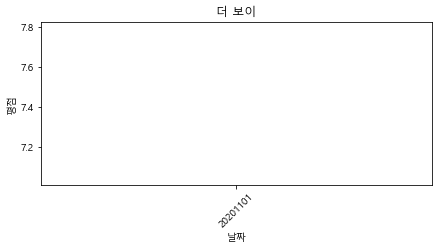

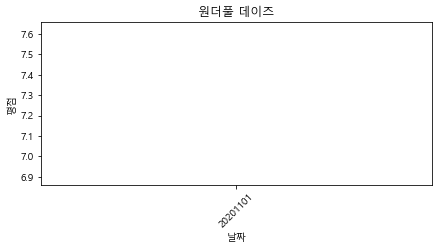

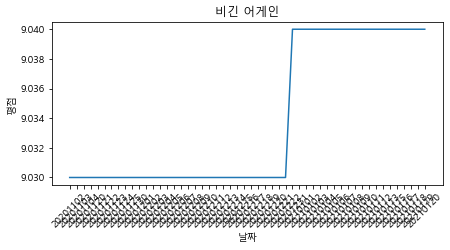

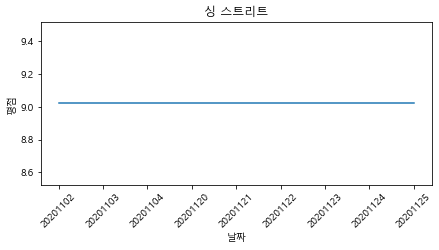

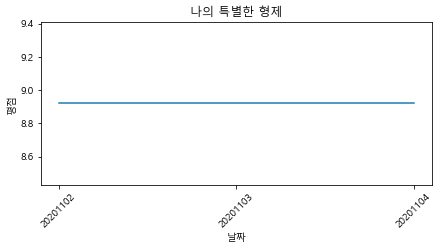

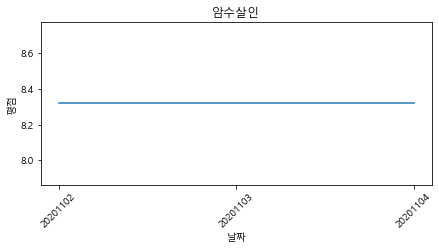

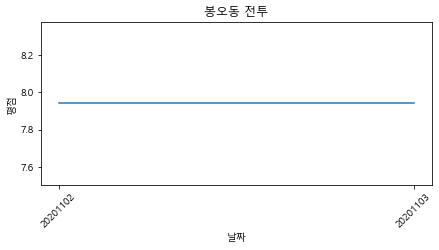

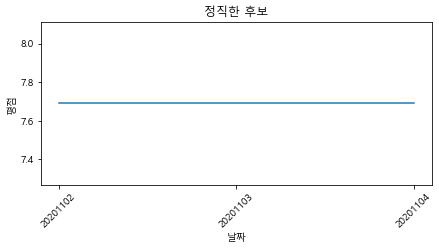

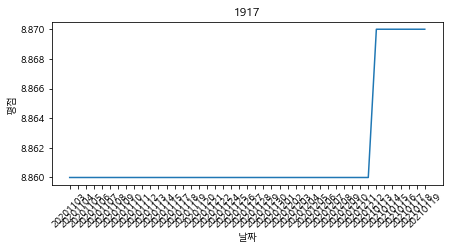

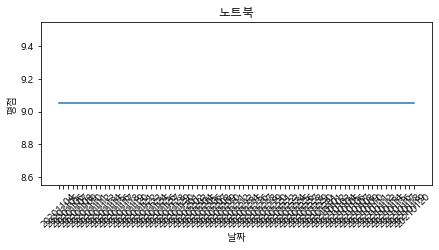

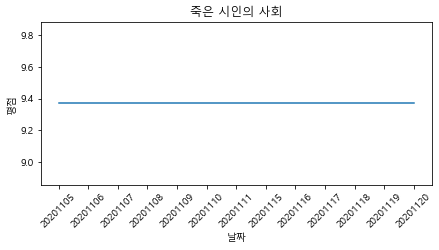

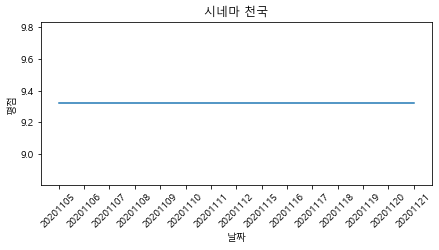

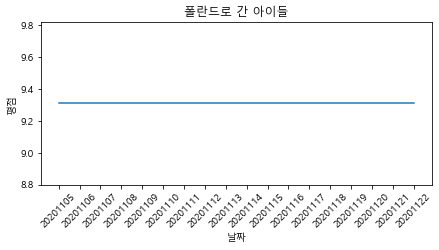

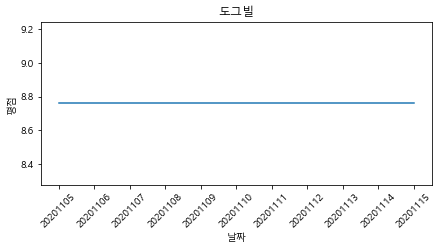

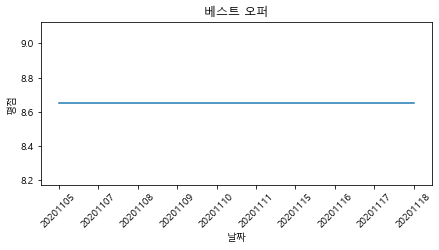

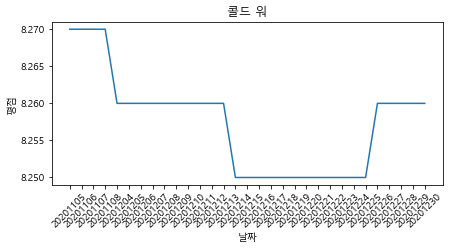

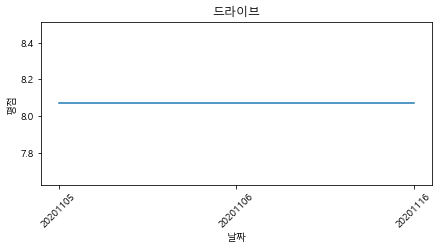

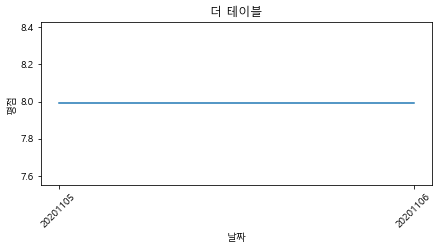

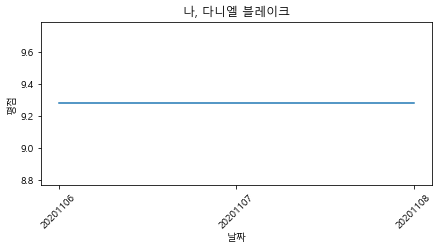

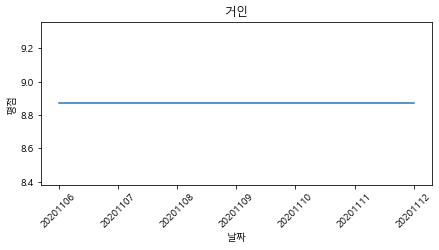

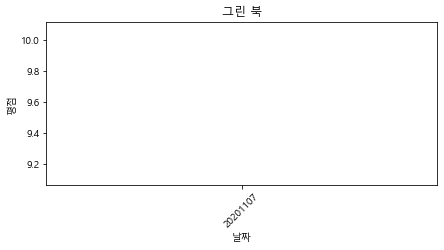

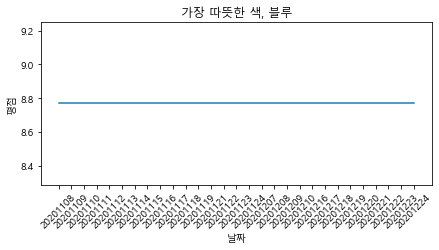

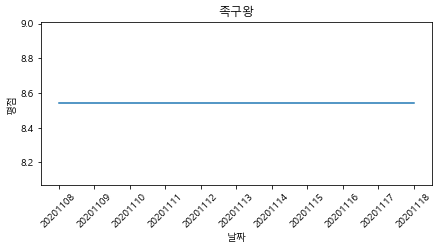

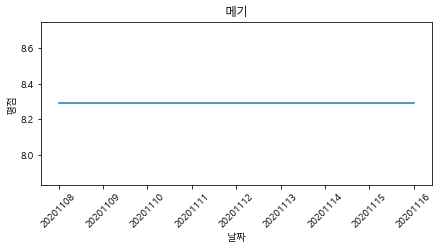

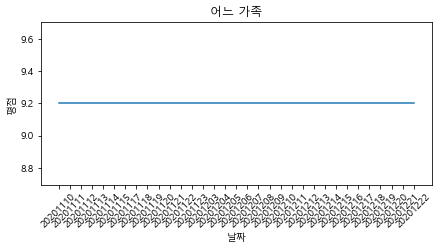

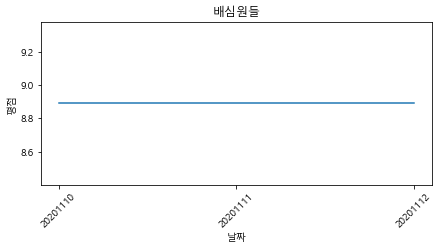

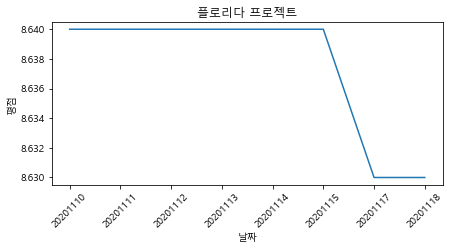

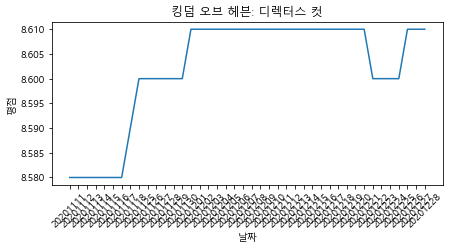

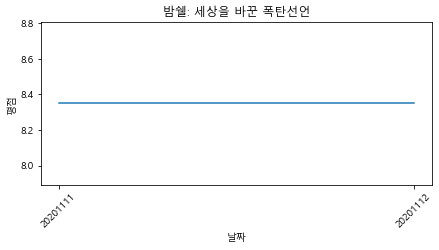

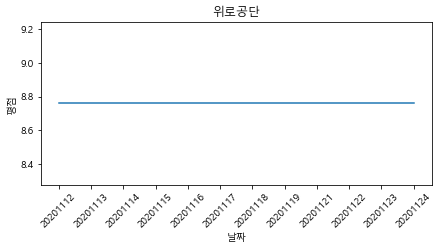

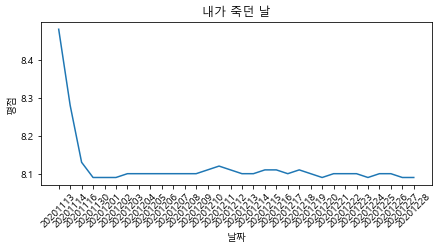

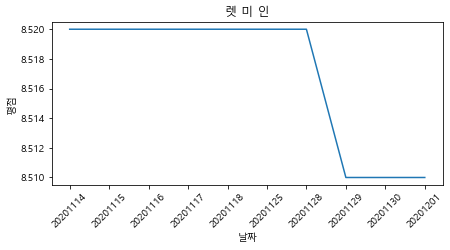

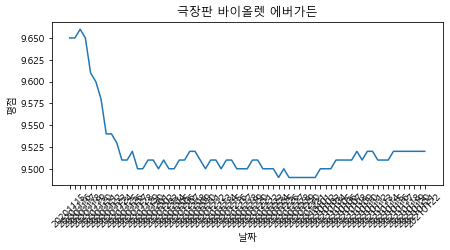

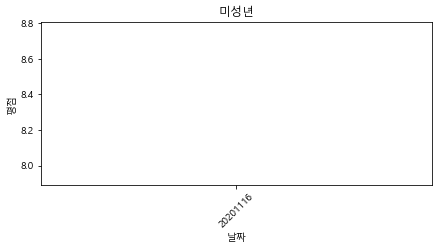

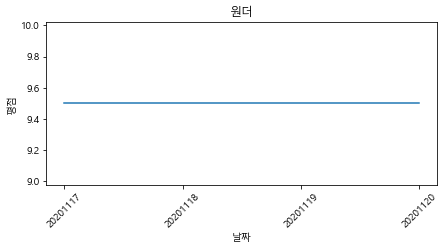

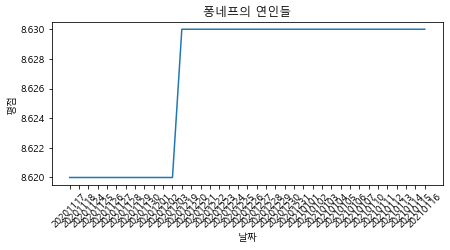

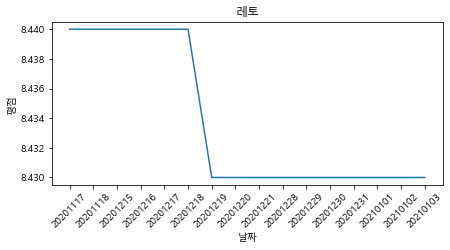

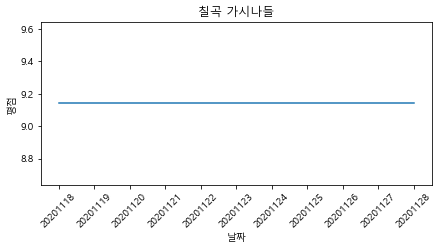

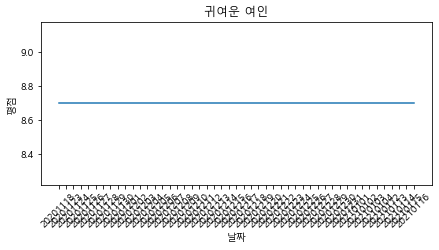

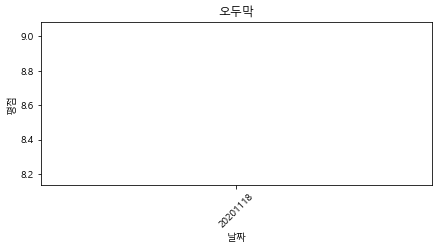

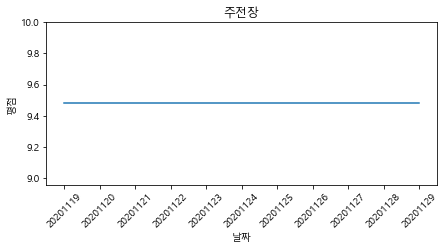

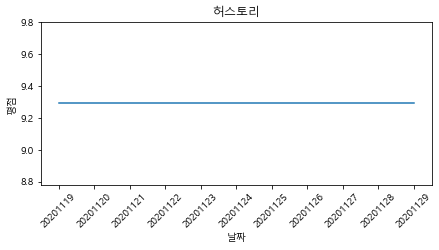

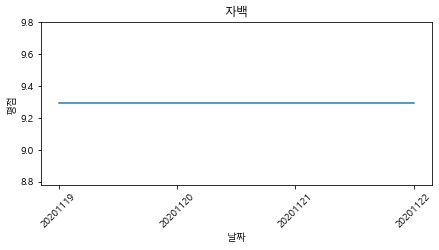

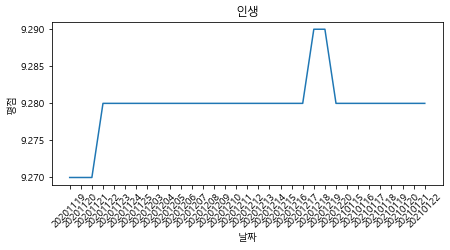

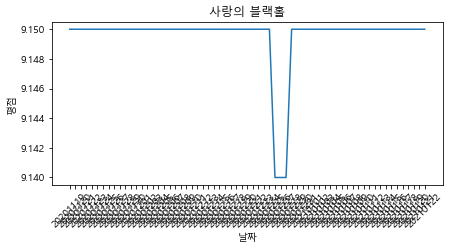

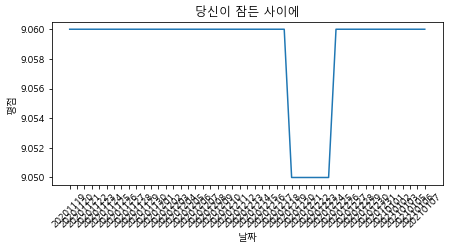

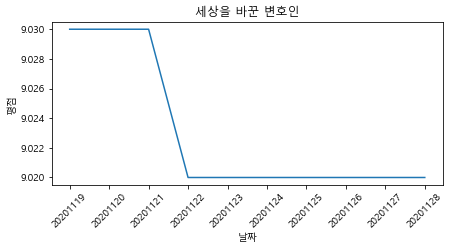

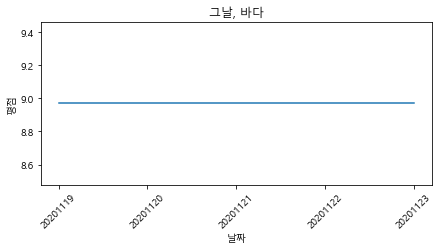

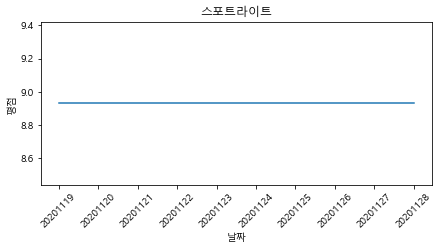

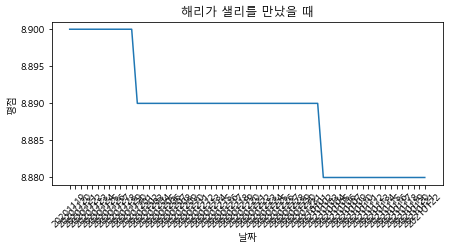

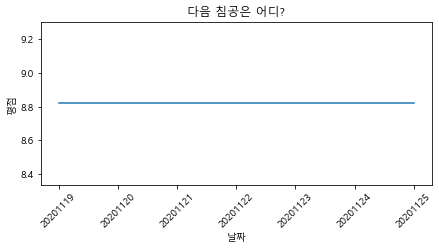

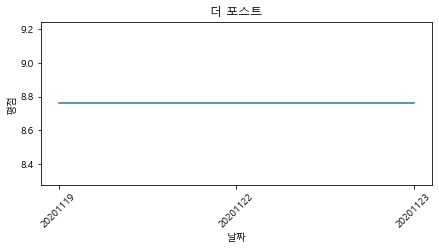

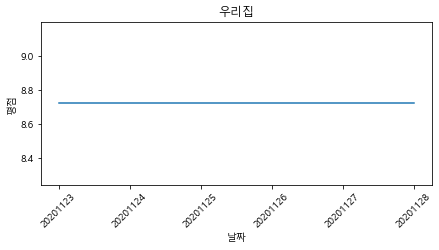

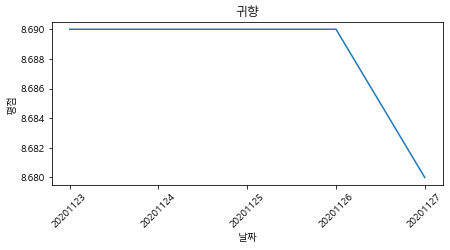

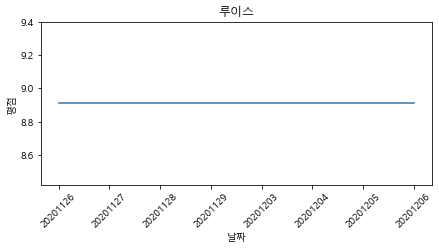

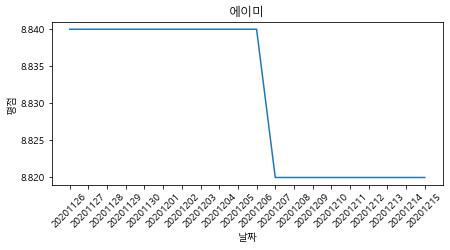

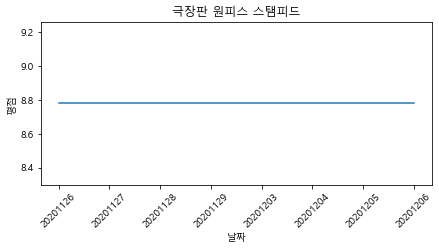

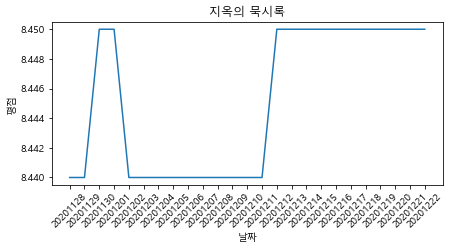

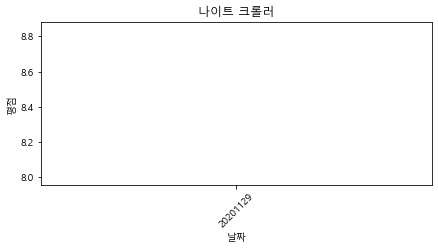

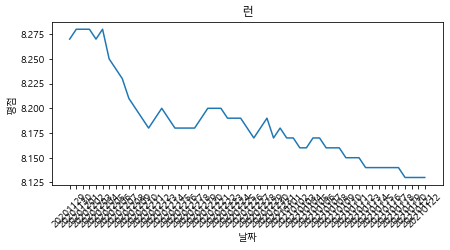

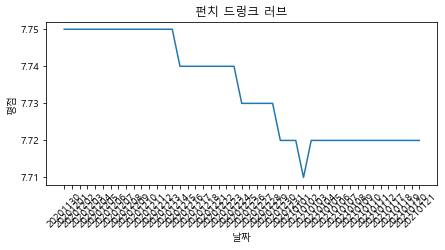

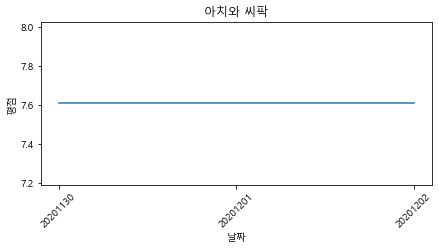

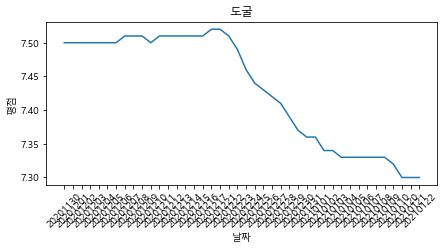

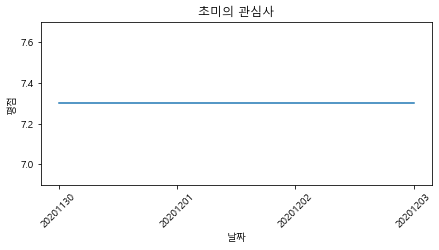

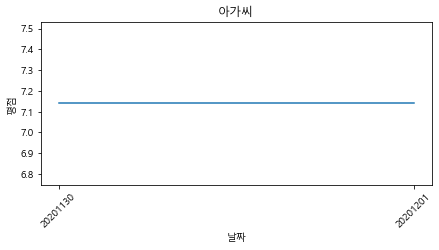

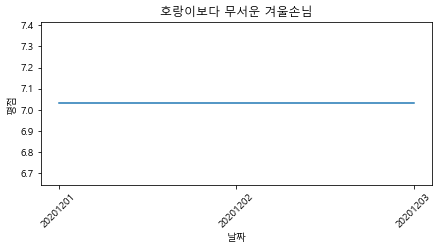

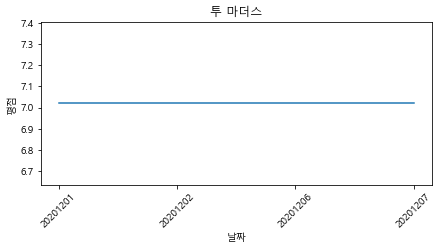

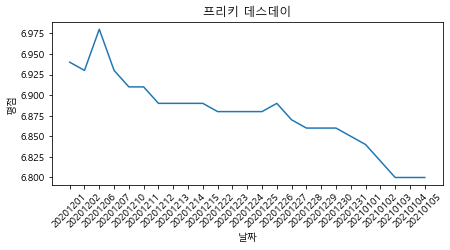

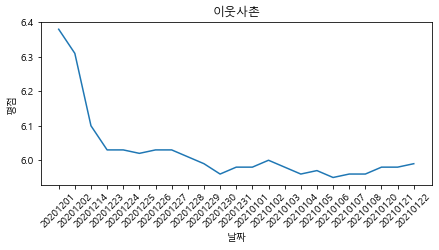

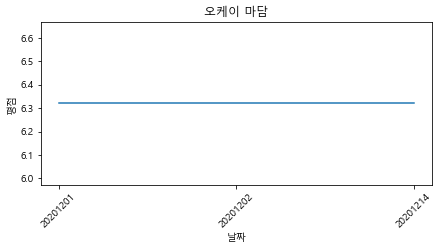

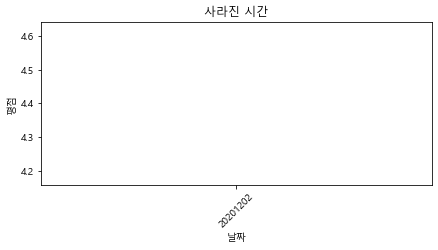

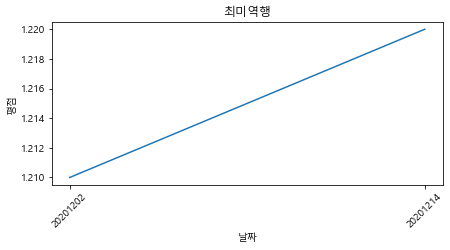

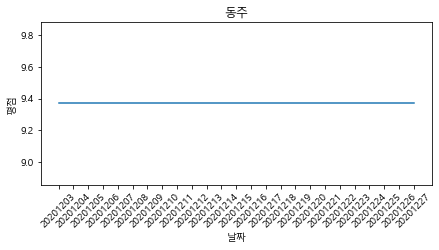

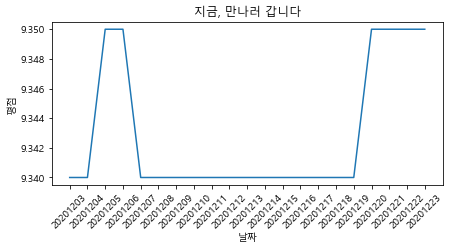

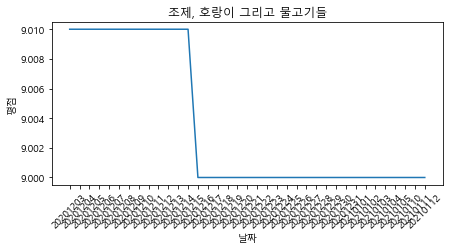

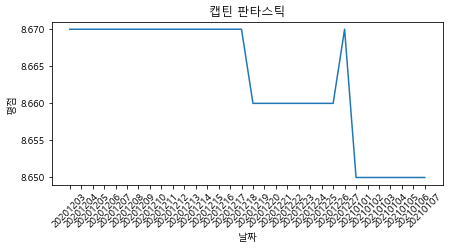

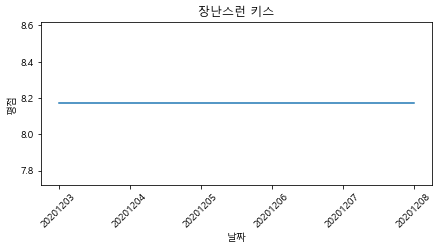

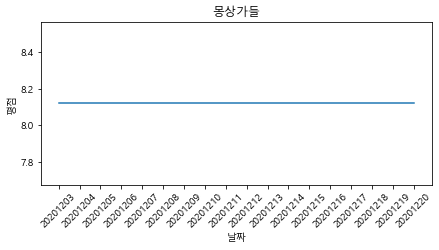

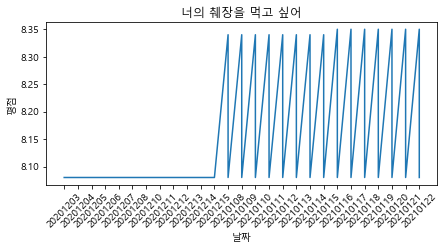

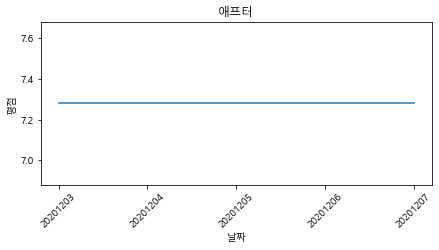

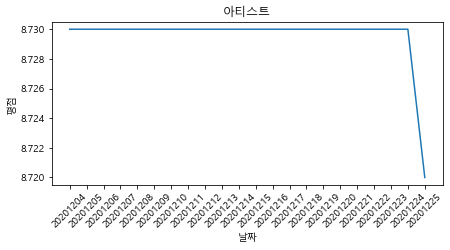

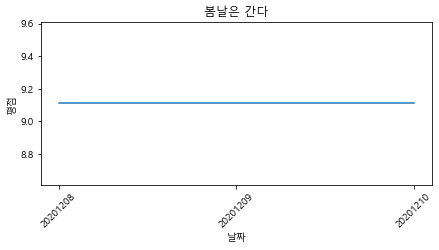

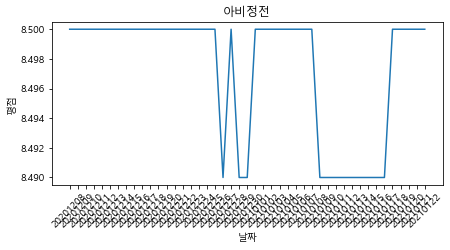

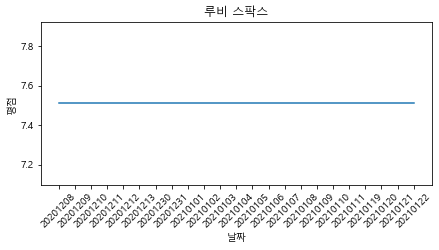

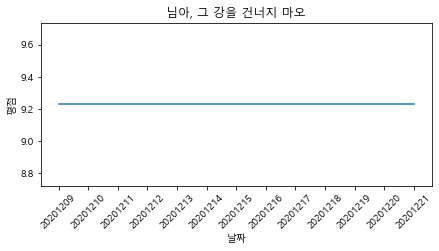

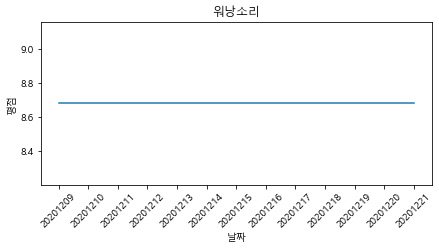

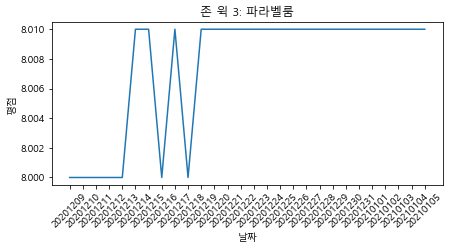

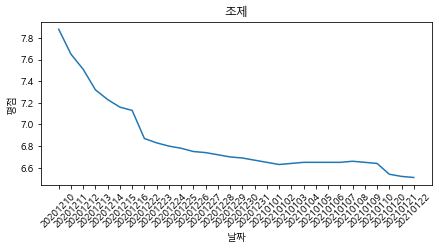

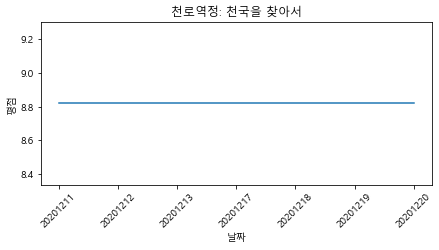

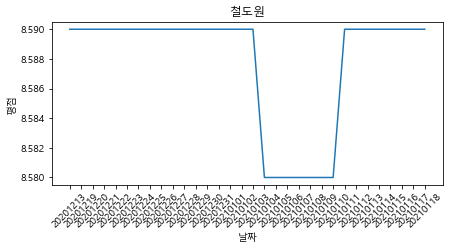

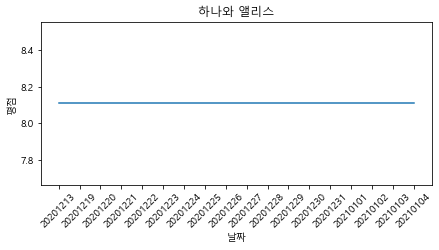

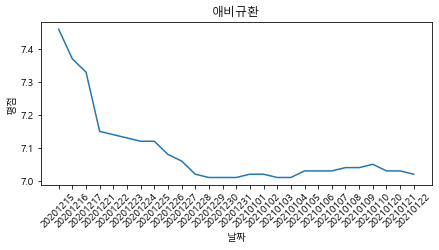

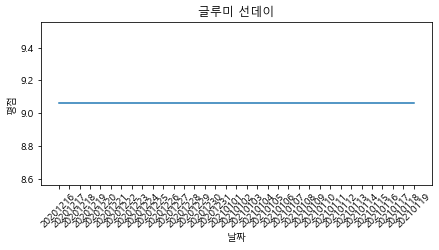

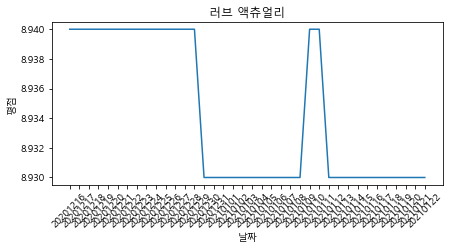

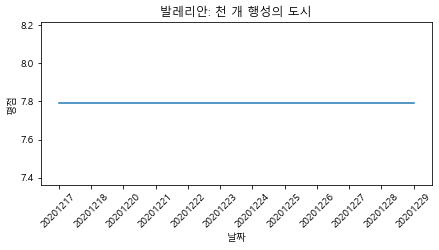

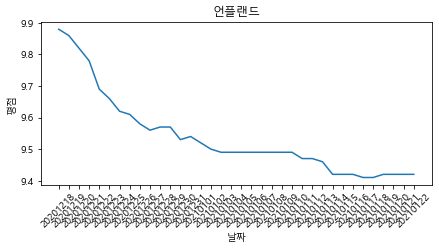

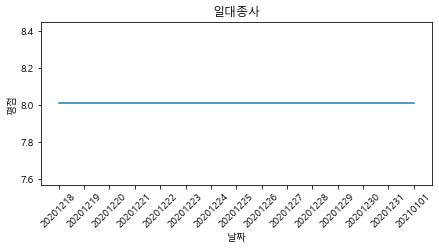

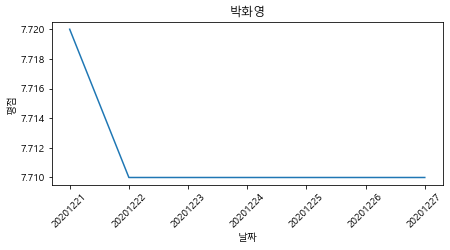

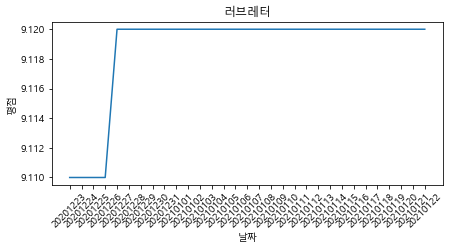

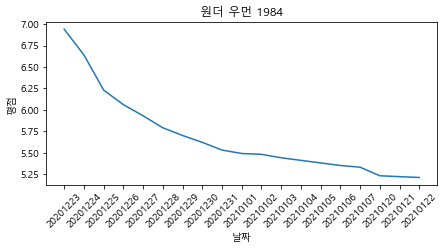

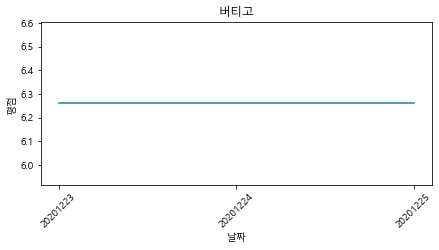

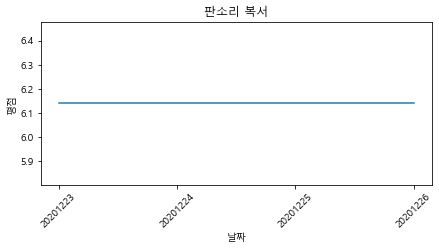

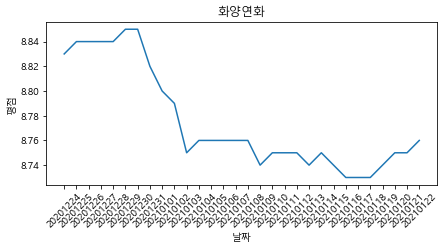

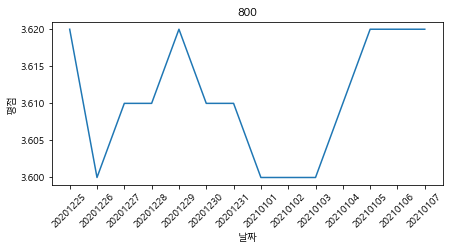

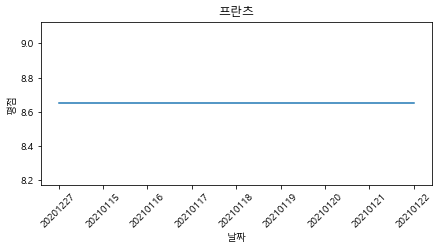

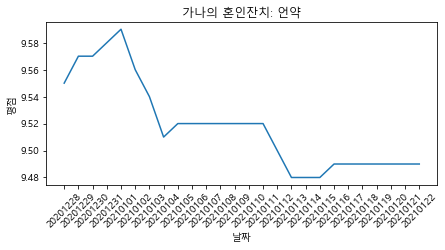

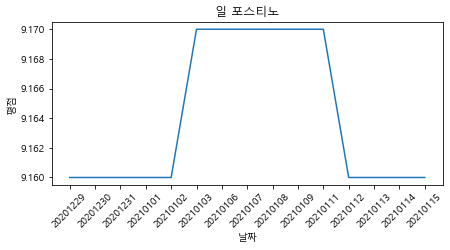

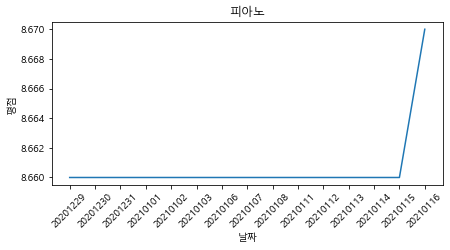

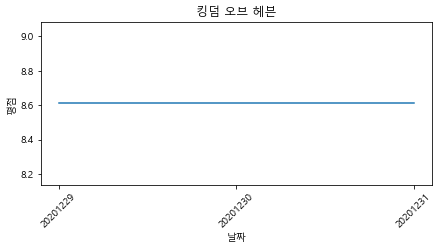

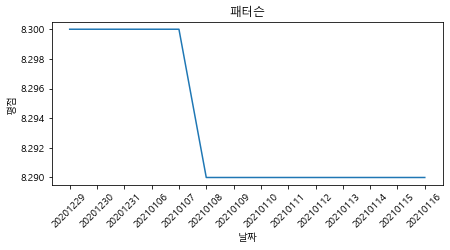

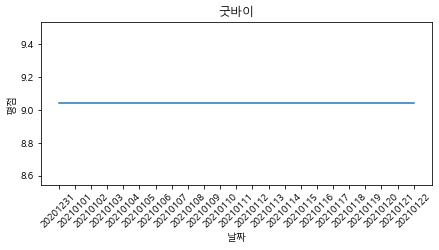

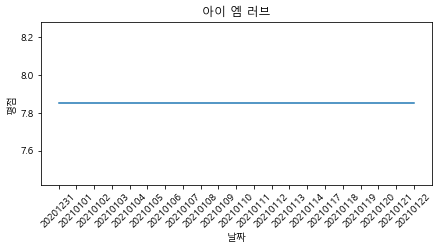

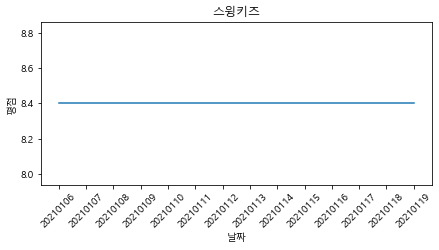

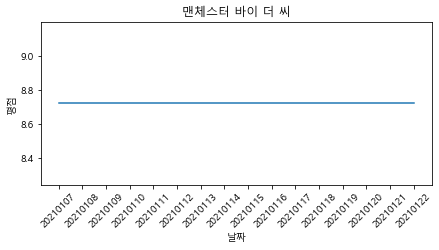

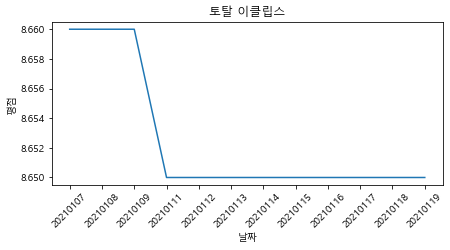

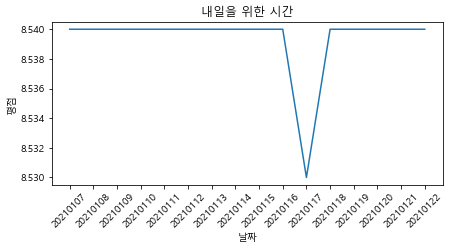

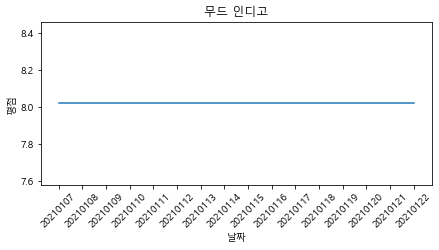

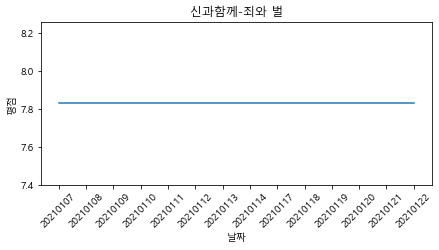

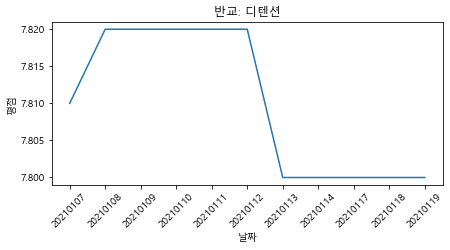

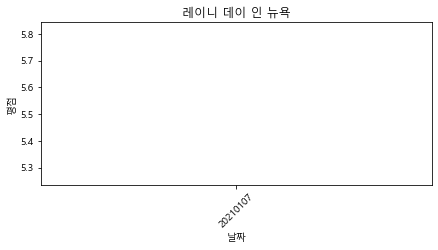

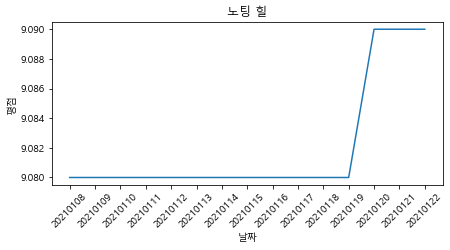

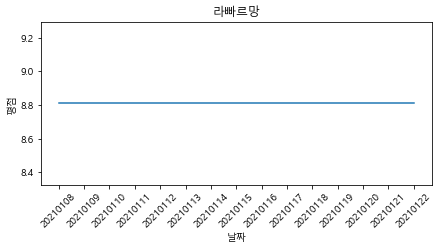

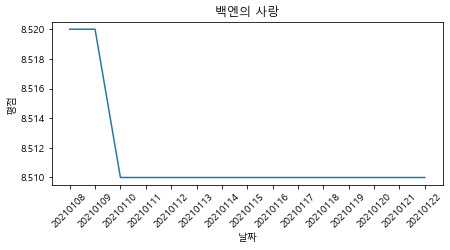

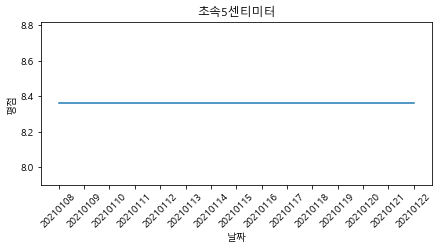

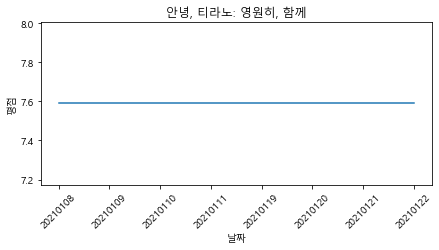

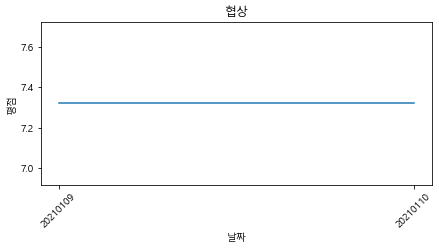

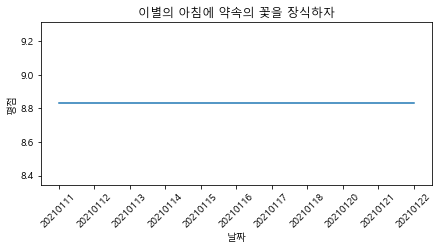

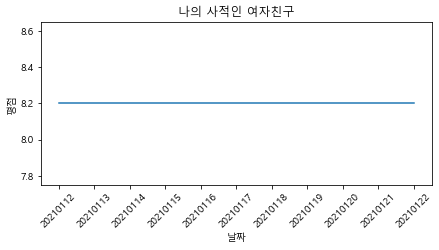

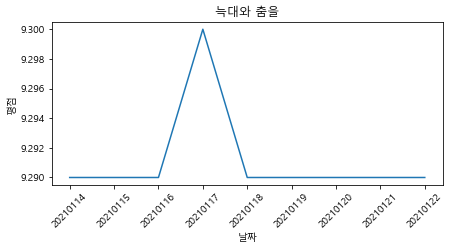

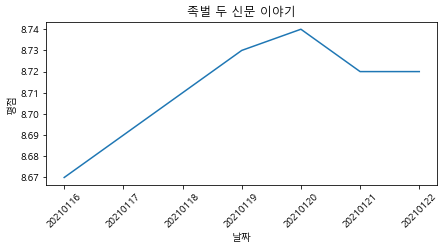

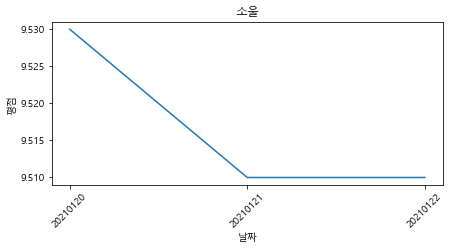

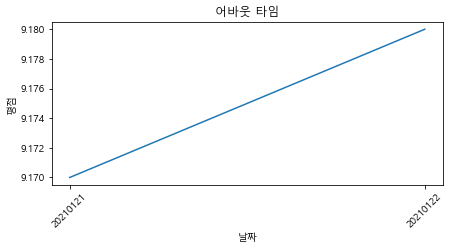

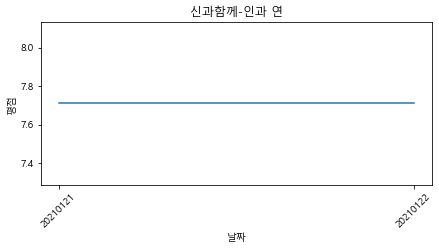

In [170]:
# 영화명 리스트
movieNm_list = df2['영화명'].unique()

for movieNm in movieNm_list:
    x = df2[df2['영화명'] == movieNm]['날짜']
    y = df2[df2['영화명'] == movieNm]['평점']

    plt.figure(figsize=(7,3))
    plt.plot(x, y)
    #plt.gca().invert_yaxis()  # y축 데이터를 역방향으로 전환하는 함수
    plt.xticks(rotation=45)
    plt.title(movieNm)
    plt.xlabel('날짜')
    plt.ylabel('평점')
    plt.show()